In [42]:
import torch

In [177]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [169]:
a = torch.load('./l2_u_g-pinn-2')

In [170]:
a1 = torch.load('./l2_u_g-gpinn-3')

In [68]:
b = torch.load('./l2_u_g-pinn-10')

In [207]:
def plot_l2_loss(x, y_nn1, y_nn2, y_gnn1, y_gnn2, xlabel, ylabel, savedir):
    plt.clf()
    plt.rcParams.update({"font.size": 24})
    plt.figure(4, (20, 15))
    # plt.plot(x1, y1, 'o-', color='blue', label='PINN')
    # plt.plot(x2, y2, 's-', color='red', label='gPINN')
    x_major_locator=MultipleLocator(5)
    ax=plt.gca()
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    ax.xaxis.set_major_locator(x_major_locator)
    plt.fill_between(x, y_nn1, y_nn2,  alpha=.5, linewidth=0, color='blue')
    plt.fill_between(x, y_gnn1, y_gnn2,  alpha=.5, linewidth=0, color='red')
    y1 = [(y_nn1[i]+y_nn2[i])/2 for i in range(min(len(y_nn1),len(y_nn2)))]
    y2 = [(y_gnn1[i]+y_gnn2[i])/2 for i in range(min(len(y_gnn1),len(y_gnn2)))]
    plt.plot(x, y_nn1, color='cornflowerblue')
    plt.plot(x, y1, 'o-', color='blue', label='PINN')
    plt.plot(x, y_nn2, color='cornflowerblue')
    plt.plot(x, y_gnn1, color='orangered')
    plt.plot(x, y2, 's-', color='red', label='gPINN')
    plt.plot(x, y_gnn2, color='orangered')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(frameon=False)
    plt.savefig(savedir)

In [239]:
a1 = torch.load('./l2_u_g-pinn-2')
a2 = torch.load('./l2_u_g-pinn-10')
a3 = torch.load('./l2_u_g-gpinn-10')
a4 = torch.load('./l2_u_g-gpinn-3')

In [240]:
x1 = []
for key in a1.keys():
    x1.append(key[15:])
    
y1 = []
for value in a1.values():
    y1.append(value)

In [241]:
x2 = []
for key in a2.keys():
    x2.append(key[15:])
    
y2 = []
for value in a2.values():
    y2.append(value)

In [242]:
x3 = []
for key in a3.keys():
    x3.append(key[15:])
    
y3 = []
for value in a3.values():
    y3.append(value)

In [243]:
x4 = []
for key in a4.keys():
    x4.append(key[15:])
    
y4 = []
for value in a4.values():
    y4.append(value)

In [244]:
import numpy as np
x = np.linspace(5, 30, 26)

<Figure size 144x144 with 0 Axes>

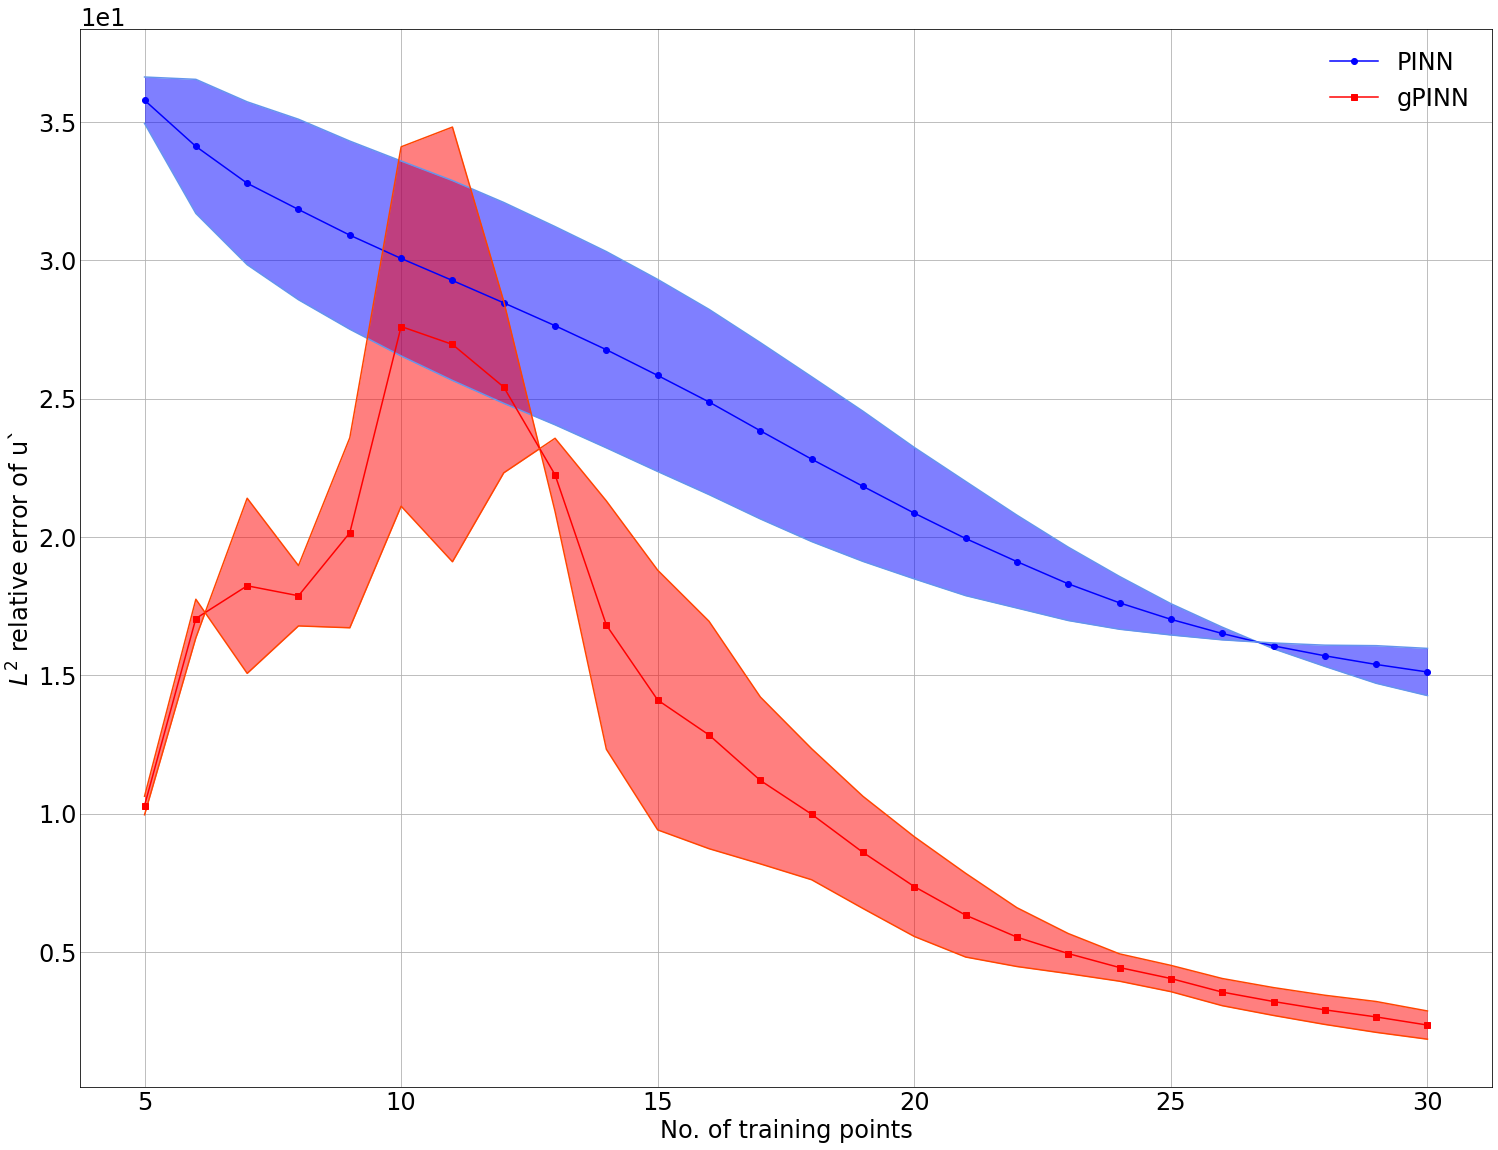

In [245]:
plot_l2_loss(x, y1, y2, y3, y4, 'No. of training points', '$L^2$ relative error of u`', './L2 0f u`.png')